In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./processed/feature_scaled.csv')
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,-1.280248,0,1,-1.161694,-0.994363,0,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0.064303,1,0,-0.260878,-0.173753,0,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,0,0,-1.239504,1,1,-0.363923,-0.959509,1,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0.512486,0,0,-0.747850,-0.195372,0,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,-1.239504,1,1,0.196178,-0.940538,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,1,1,-0.343137,1,1,0.664868,-0.129193,0,...,False,False,True,False,True,False,False,False,False,True
7028,2234-XADUH,0,1,1,1.612573,1,1,1.276493,2.240869,0,...,False,False,True,False,True,False,False,True,False,False
7029,4801-JZAZL,0,1,1,-0.872808,0,1,-1.170004,-0.854506,0,...,True,False,False,True,False,False,False,False,True,False
7030,8361-LTMKD,1,1,0,-1.158016,1,1,0.319168,-0.872154,1,...,True,False,False,True,False,False,False,False,False,True


In [3]:
x = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']

In [4]:
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,service_adoption_score,tenure_bins,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.280248,0,1,-1.161694,-0.994363,1,1,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0.064303,1,0,-0.260878,-0.173753,3,3,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,-1.239504,1,1,-0.363923,-0.959509,3,1,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0.512486,0,0,-0.747850,-0.195372,3,3,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,-1.239504,1,1,0.196178,-0.940538,1,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,-0.343137,1,1,0.664868,-0.129193,7,3,...,False,False,True,False,True,False,False,False,False,True
7028,0,1,1,1.612573,1,1,1.276493,2.240869,6,2,...,False,False,True,False,True,False,False,True,False,False
7029,0,1,1,-0.872808,0,1,-1.170004,-0.854506,1,1,...,True,False,False,True,False,False,False,False,True,False
7030,1,1,0,-1.158016,1,1,0.319168,-0.872154,2,1,...,True,False,False,True,False,False,False,False,False,True


In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
SMOTE = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = SMOTE.fit_resample(X_train, y_train)

/var/folders/n1/3qtzdh9s0nb9z0dcczgz0ddw0000gn/T/ipykernel_37457/3952813592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


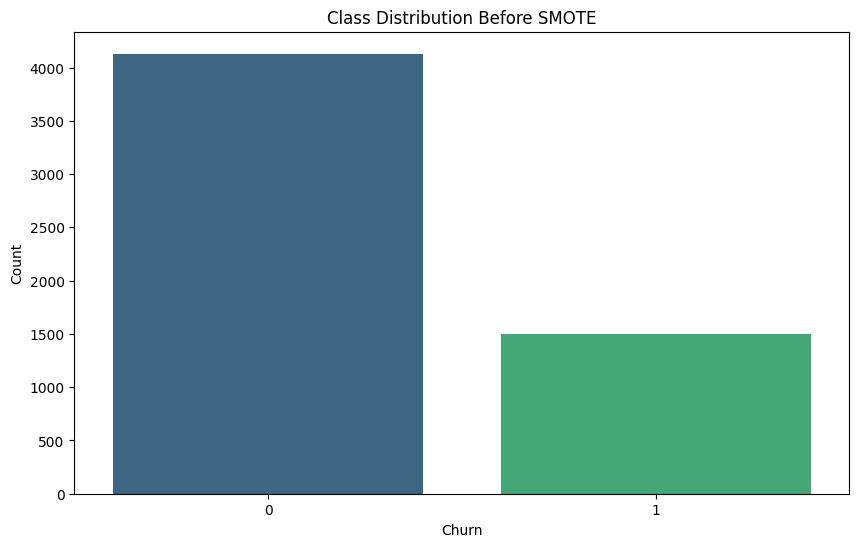

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

/var/folders/n1/3qtzdh9s0nb9z0dcczgz0ddw0000gn/T/ipykernel_37457/4265438252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='viridis')


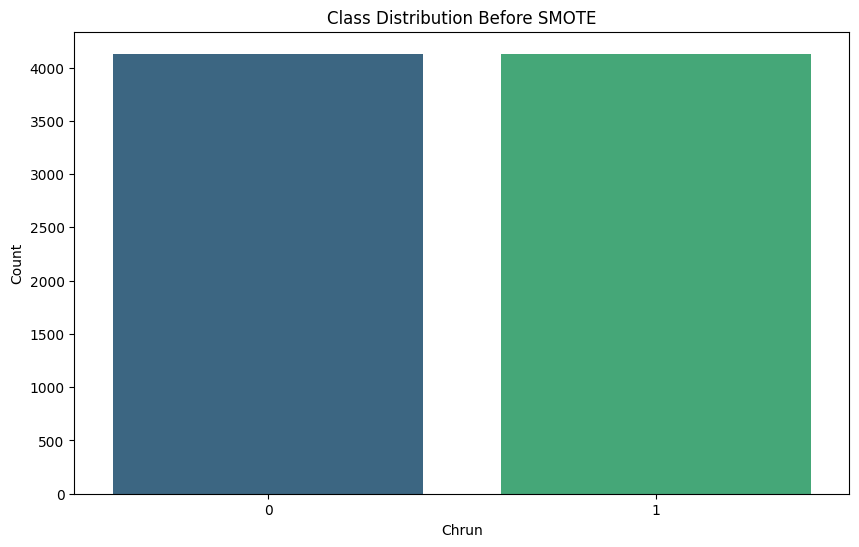

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Chrun')
plt.ylabel('Count')
plt.show()

In [9]:
np.savez('../artifacts/X_train_resampled.npz', X_train_resampled)
np.savez('../artifacts/y_train_resampled.npz', y_train_resampled)
np.savez('../artifacts/X_test.npz', X_test)
np.savez('../artifacts/y_test.npz', y_test)